## Install Libraries

In [1]:
!pip3 install -r requirements_current.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [3]:
import importlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import models
import parameters
import preprocessing

In [6]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/kevinchs0808/Desktop/DSA4263/final-project/preprocessing.py'>

# Import Dataset

In [7]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [8]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [9]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [10]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [11]:
rf_model.train()
rf_model.predict()

In [12]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.825,
 'precision': 0.675,
 'recall': 0.5510204081632653,
 'f1_score': 0.6067415730337078}

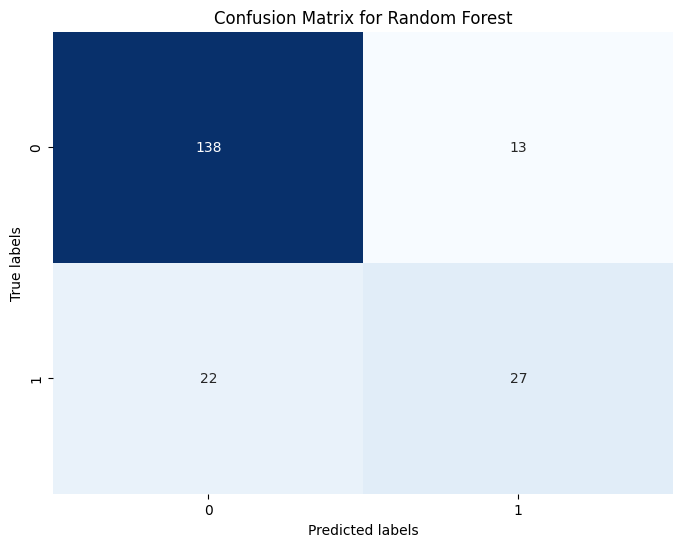

In [13]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [14]:
rf_model.finetune()

[I 2024-04-06 11:17:46,457] A new study created in memory with name: no-name-397fe410-534a-45ae-88ed-4ec01e9e0207
[I 2024-04-06 11:17:47,645] Trial 0 finished with value: 0.6038647342995169 and parameters: {'n_estimators': 10, 'max_depth': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6038647342995169.
[I 2024-04-06 11:17:48,816] Trial 1 finished with value: 0.6113605735196207 and parameters: {'n_estimators': 7, 'max_depth': 1, 'criterion': 'entropy'}. Best is trial 1 with value: 0.6113605735196207.
[I 2024-04-06 11:17:50,170] Trial 2 finished with value: 0.6085308411645477 and parameters: {'n_estimators': 81, 'max_depth': 7, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.6113605735196207.
[I 2024-04-06 11:17:51,387] Trial 3 finished with value: 0.6137815517234214 and parameters: {'n_estimators': 28, 'max_depth': 6, 'criterion': 'gini'}. Best is trial 3 with value: 0.6137815517234214.
[I 2024-04-06 11:17:52,565] Trial 4 finished with value: 0.6052783916657524 and p

(0.6400645990178068,
 {'n_estimators': 77, 'max_depth': 4, 'criterion': 'log_loss'})

In [15]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6,
 'recall': 0.7346938775510204,
 'f1_score': 0.6605504587155964}

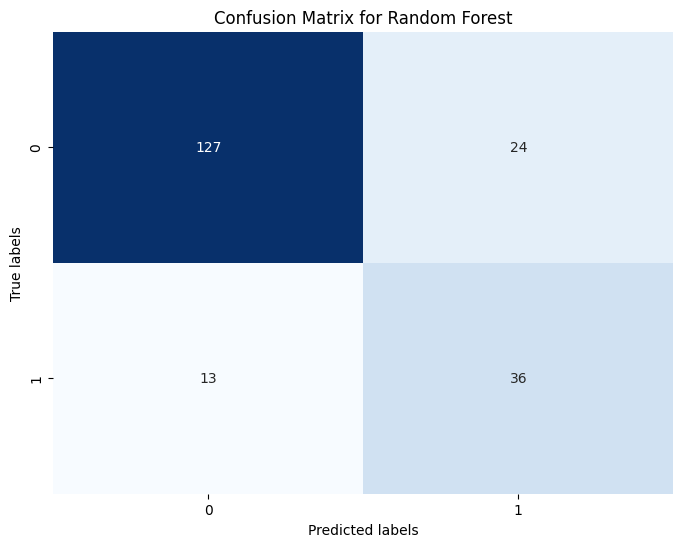

In [16]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

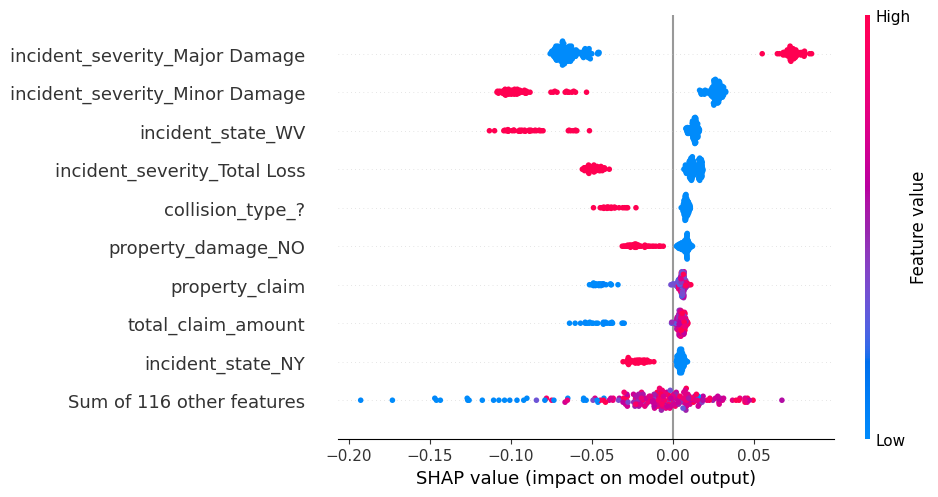

In [17]:
rf_model.shap_explanation(is_tree=True, class_to_observe=1)

# Decision Tree

In [18]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [19]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [20]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [21]:
dt_model.train()
dt_model.predict()

In [22]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.79,
 'precision': 0.5614035087719298,
 'recall': 0.6530612244897959,
 'f1_score': 0.6037735849056605}

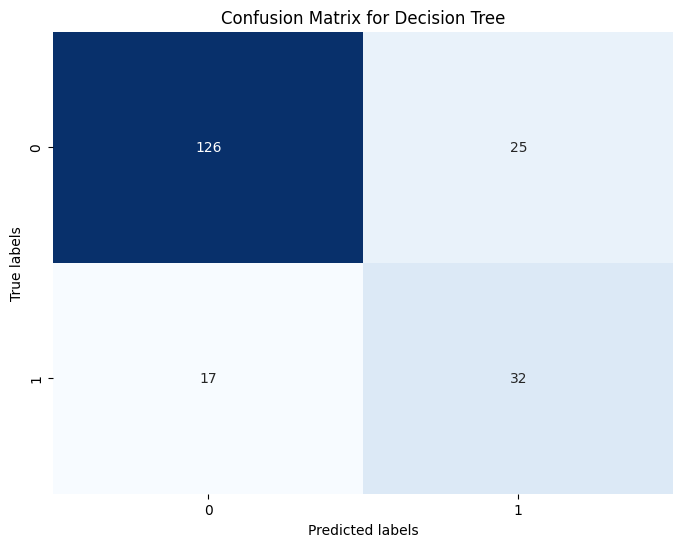

In [23]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [24]:
dt_model.finetune()

[I 2024-04-06 11:19:55,020] A new study created in memory with name: no-name-4402de6a-4911-4226-849d-e4c76be0ae9f
[I 2024-04-06 11:19:56,193] Trial 0 finished with value: 0.6542124542124542 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6542124542124542.
[I 2024-04-06 11:19:57,400] Trial 1 finished with value: 0.5992356447478099 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6542124542124542.
[I 2024-04-06 11:19:58,564] Trial 2 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6542124542124542.
[I 2024-04-06 11:19:59,750] Trial 3 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6542124542124542.
[I 2024-04-06 11:20:00,959] Trial 4 finished with value: 0.628822

(0.665458348988121,
 {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2})

In [25]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.73,
 'precision': 0.45901639344262296,
 'recall': 0.5714285714285714,
 'f1_score': 0.5090909090909091}

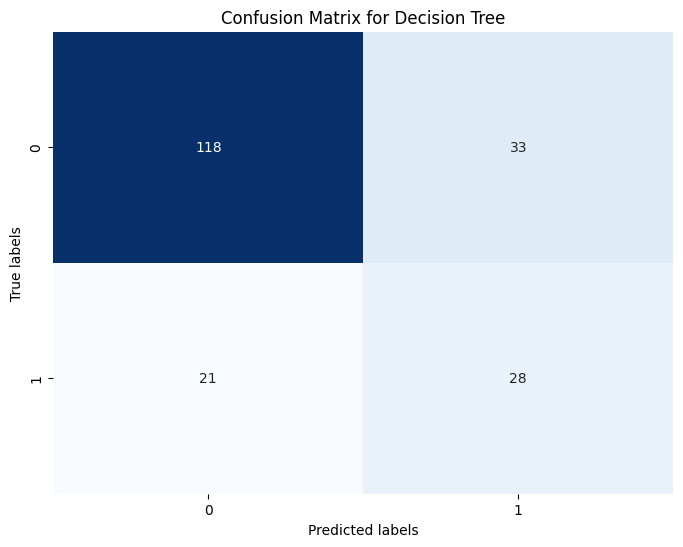

In [26]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

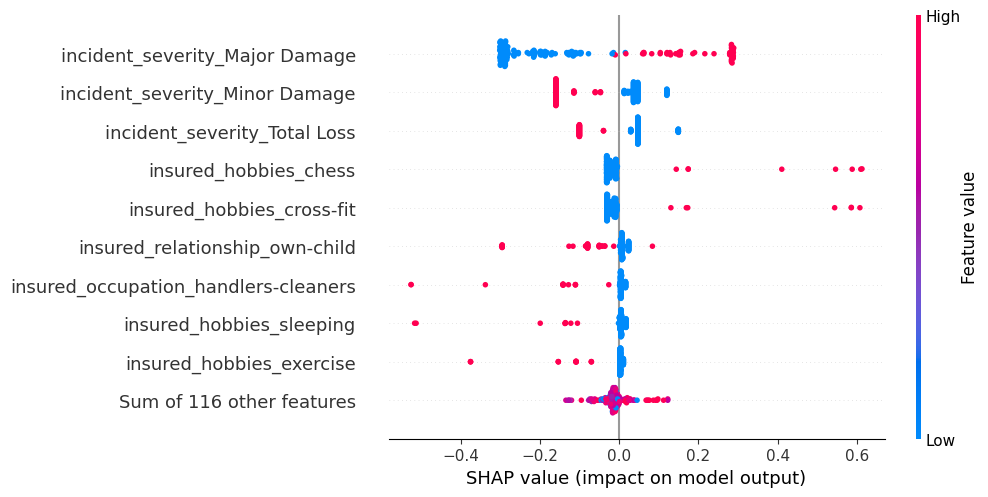

In [27]:
dt_model.shap_explanation(is_tree=True, class_to_observe=1)

[Text(0.5625, 0.9166666666666666, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.33035714285714285, 0.75, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.23214285714285715, 0.5833333333333334, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.14285714285714285, 0.4166666666666667, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.07142857142857142, 0.25, 'incident_severity_Total Loss <= 0.5\ngini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.499\nsamples = 143\nvalue = [68, 75]\nclass = N'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]\nclass = Y'),
 Text(0.21428571428571427, 0.25, 'total_claim_amount <= 80348.5\ngini = 0.106\nsamples = 267\nv

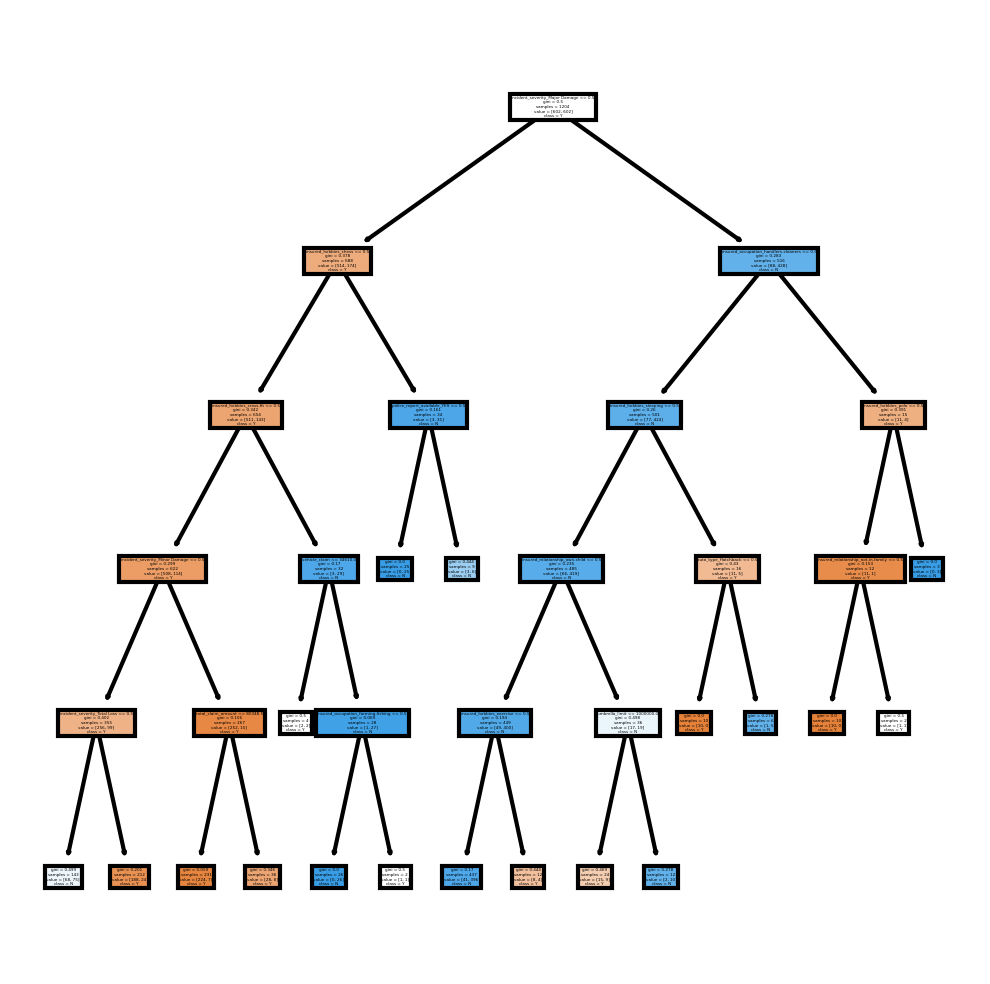

In [30]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)

# XGBoost

## Dataset Creation

In [31]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [32]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [33]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [34]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [35]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [36]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [37]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

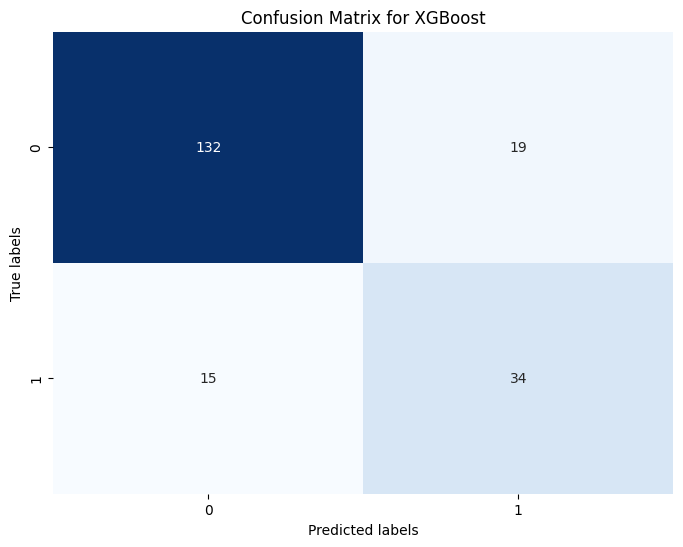

In [38]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [39]:
xgb_model.finetune()

[I 2024-04-06 11:23:08,312] A new study created in memory with name: no-name-44bc648c-7d8a-48ed-85ba-3783fa016f00
[I 2024-04-06 11:23:09,829] Trial 0 finished with value: 0.7350543570031653 and parameters: {'n_estimators': 146, 'max_depth': 12, 'learning_rate': 0.12, 'subsample': 0.95, 'colsample_bytree': 0.45, 'gamma': 4.2, 'reg_alpha': 1.1, 'reg_lambda': 4.3}. Best is trial 0 with value: 0.7350543570031653.
[I 2024-04-06 11:23:10,827] Trial 1 finished with value: 0.45670683558210595 and parameters: {'n_estimators': 27, 'max_depth': 31, 'learning_rate': 0.17, 'subsample': 0.8, 'colsample_bytree': 0.2, 'gamma': 3.8000000000000003, 'reg_alpha': 0.0, 'reg_lambda': 3.9000000000000004}. Best is trial 0 with value: 0.7350543570031653.
[I 2024-04-06 11:23:12,461] Trial 2 finished with value: 0.7117109557109557 and parameters: {'n_estimators': 218, 'max_depth': 33, 'learning_rate': 0.26, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.7, 'gamma': 1.8, 'reg_alpha': 0.9, 'reg_lambda': 3.

(0.7585981087818224,
 {'n_estimators': 13,
  'max_depth': 3,
  'learning_rate': 0.41000000000000003,
  'subsample': 0.6000000000000001,
  'colsample_bytree': 0.5,
  'gamma': 5.0,
  'reg_alpha': 2.1,
  'reg_lambda': 3.1})

In [40]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6190476190476191,
 'recall': 0.7959183673469388,
 'f1_score': 0.6964285714285715}

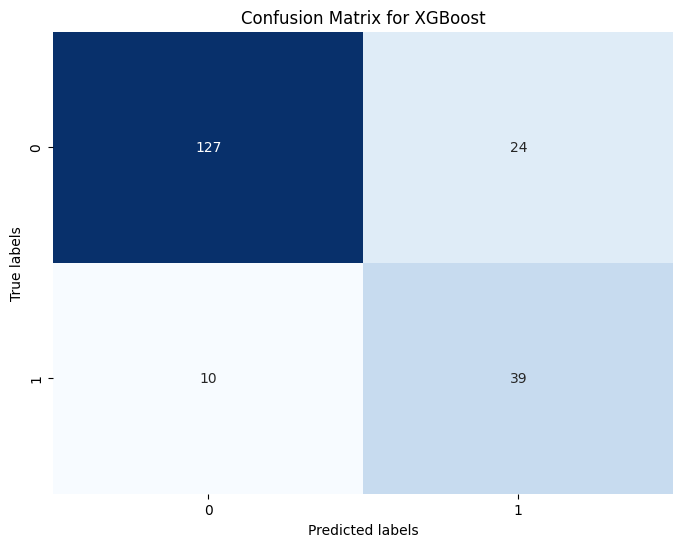

In [41]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

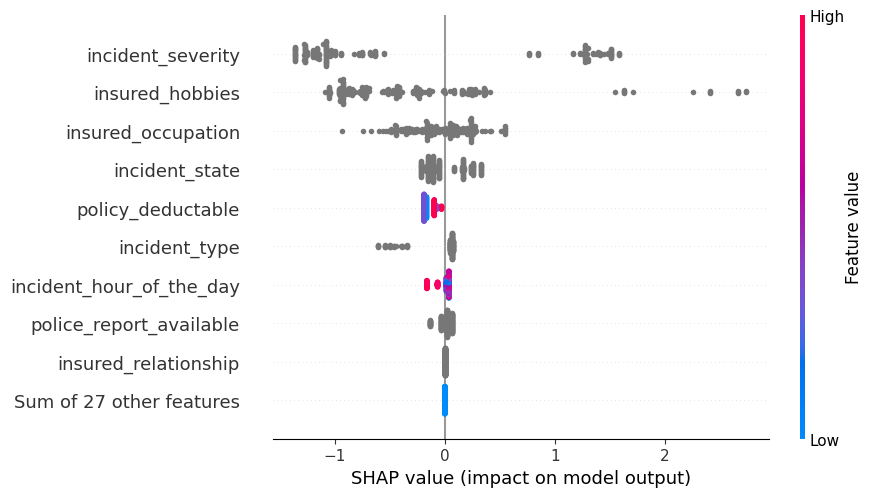

In [42]:
xgb_model.shap_explanation()

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

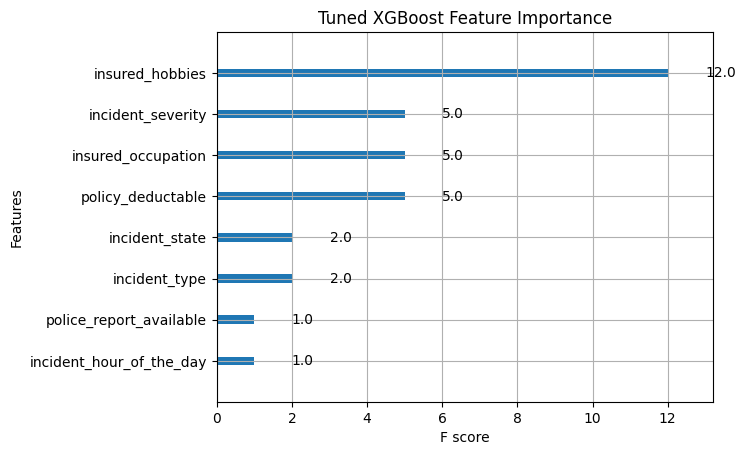

In [43]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")